# Intro to Tensorflow 

scalar(rank: 0)  --> vector (rank: 1)--> matrices(rank: 2) --> tensor 

- Two popular machine learning libraries :
    - sklearn; can be good for kmeans clustering , random forest  
    - tensorflow; google released in end of 2015; leading library for neural networks, cnn and rnn
        - uses both cpu and gpu; this is crucial for the speed of algorithms and TF utilizes more computing power and this is done automatically 
        - google also introduced TPU (Tebsor Processing unit)
        
Tensor flow is a **deep learning library**     

##  Tensorflow 1 vs Tensorflow 2
- TF1 strange methods and logic of code is unlike other libraries and hard to learn and use. 
- This led to development of high level pacakges such as PyTorch and Keras
- in 2015 Keras was integrated in core TF
- Keras and TF are open source 
- Keras is conceived as an interface for TF rather than a different libraries.
- TF2 came in 2019
    - it borrowed keras syntax
    - no duplicate or deprecated functions
    - eager execution (?)


## TF file formats
- TF does not work well with excel and csv files
- Its tensor based , so **we want format that can store the information in tensors** 
- .npz files 
    - numpy's file type. It allows to stores n-dimensional arrays
    - tensors can be represented as n-dimensional arrays. in npz files data is already organized in required format 
    - in deep learning: data --> preprocess --. save as .npz

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

## Data Generation
    
    

In [2]:
n = 1000 #

x = np.random.uniform(low=-10,high=10, size=(n, 1))
z = np.random.uniform(-10,10, (n, 1))

inputs = np.column_stack((x,z))


noise = np.random.uniform(-1,1, (n,1))

y  = 2*x - 3*z + 5 + noise
inputs.shape

print(inputs.shape , y.shape)

# saving in TF format 
np.savez('tf_intro', inputs= inputs, targets = y)


(1000, 2) (1000, 1)


## Solving with TF 
- With TF we must build our model 
- tf.keras --> module
- tf.keras.Sequential  --> function that indicates that we are laying down the model 
- tf.keras.layers.Dense --> takes the input provided to the model and calculates the dot product of the inputs and the weights and adds the bias. Also applies activation function 
- SGD --> Stochastic Gradient Descent; generalization of gradient descent algorithm 
- Epoch --> iteration over the full dataset 
- verbose = 0 stands for silent or no output about the training is displayed
- try verbose = 1 and verbose = 2 
- kernel_initializer --> broader term for weight 

In [3]:
training_data = np.load('tf_intro.npz')

In [4]:
input_size = 2
output_size = 1

model  = tf.keras.Sequential([
                                tf.keras.layers.Dense(output_size, 
                                kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)) 
                                
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer = custom_optimizer, loss = 'huber_loss')


model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)


Epoch 1/100
32/32 - 0s - loss: 10.8665
Epoch 2/100
32/32 - 0s - loss: 4.2346
Epoch 3/100
32/32 - 0s - loss: 3.4658
Epoch 4/100
32/32 - 0s - loss: 2.8011
Epoch 5/100
32/32 - 0s - loss: 2.1580
Epoch 6/100
32/32 - 0s - loss: 1.5552
Epoch 7/100
32/32 - 0s - loss: 0.9726
Epoch 8/100
32/32 - 0s - loss: 0.5398
Epoch 9/100
32/32 - 0s - loss: 0.3067
Epoch 10/100
32/32 - 0s - loss: 0.2158
Epoch 11/100
32/32 - 0s - loss: 0.1869
Epoch 12/100
32/32 - 0s - loss: 0.1754
Epoch 13/100
32/32 - 0s - loss: 0.1724
Epoch 14/100
32/32 - 0s - loss: 0.1735
Epoch 15/100
32/32 - 0s - loss: 0.1719
Epoch 16/100
32/32 - 0s - loss: 0.1692
Epoch 17/100
32/32 - 0s - loss: 0.1716
Epoch 18/100
32/32 - 0s - loss: 0.1699
Epoch 19/100
32/32 - 0s - loss: 0.1707
Epoch 20/100
32/32 - 0s - loss: 0.1723
Epoch 21/100
32/32 - 0s - loss: 0.1679
Epoch 22/100
32/32 - 0s - loss: 0.1691
Epoch 23/100
32/32 - 0s - loss: 0.1713
Epoch 24/100
32/32 - 0s - loss: 0.1717
Epoch 25/100
32/32 - 0s - loss: 0.1746
Epoch 26/100
32/32 - 0s - loss: 0

### Extract weights and biases


In [5]:
model.layers[0].get_weights()

[array([[ 1.9806306],
        [-3.025683 ]], dtype=float32),
 array([4.9960575], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9806306],
       [-3.025683 ]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9960575], dtype=float32)

## Extract the outputs (make predictions) 

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 14.1],
       [-10.8],
       [-10.5],
       [  9.2],
       [-22.1],
       [ 46.9],
       [ 27.8],
       [ 13.2],
       [-22.7],
       [ 12.5],
       [ 16.2],
       [ 37.6],
       [ 11.7],
       [ 26.7],
       [-19.8],
       [-10.9],
       [ -4.4],
       [ 11.3],
       [-15.8],
       [-14. ],
       [ -5.9],
       [ 39.5],
       [  5.8],
       [ -7.9],
       [-31.5],
       [-10.3],
       [-24.8],
       [ 25.1],
       [-21.2],
       [ 15. ],
       [-31.4],
       [  3.6],
       [ 13.5],
       [-21.2],
       [ 12.6],
       [ -9.1],
       [-22.2],
       [ 20.2],
       [  6.4],
       [ 15.8],
       [-19.4],
       [  6.7],
       [ 18.7],
       [  7.3],
       [ 28.4],
       [ -7.3],
       [-15. ],
       [ 46.1],
       [ 15.5],
       [ 26.7],
       [ 20.2],
       [ 27.5],
       [ 20.9],
       [-20.5],
       [ -0.8],
       [ 34.2],
       [ 31.4],
       [ -6.2],
       [ 17.4],
       [ 21.5],
       [-12. ],
       [ -8. ],
       [

In [9]:
training_data['targets'].round(1)

array([[ 12.9],
       [-11.4],
       [ -9.5],
       [  8.7],
       [-21.9],
       [ 46.6],
       [ 28.4],
       [ 12.1],
       [-23.6],
       [ 12.1],
       [ 17.3],
       [ 37.7],
       [ 10.5],
       [ 27.5],
       [-19.3],
       [-11.5],
       [ -5.1],
       [ 11.7],
       [-14.9],
       [-13.9],
       [ -5.7],
       [ 39.5],
       [  5.6],
       [ -8.9],
       [-31.5],
       [-11.2],
       [-24.4],
       [ 25.1],
       [-22. ],
       [ 15. ],
       [-31.7],
       [  3. ],
       [ 13. ],
       [-20.9],
       [ 11.3],
       [ -7.9],
       [-21.4],
       [ 20. ],
       [  5.8],
       [ 14.9],
       [-19.5],
       [  6.7],
       [ 18. ],
       [  7.2],
       [ 29. ],
       [ -6.4],
       [-14.7],
       [ 45.7],
       [ 14.8],
       [ 26.6],
       [ 20.2],
       [ 27.4],
       [ 20. ],
       [-20.2],
       [ -0.9],
       [ 34.5],
       [ 31.4],
       [ -6.2],
       [ 16.7],
       [ 21.6],
       [-11.9],
       [ -7.2],
       [

### Plotting the data

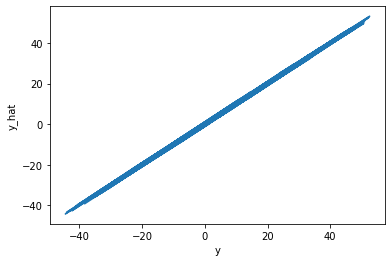

In [10]:
plt.plot(training_data['targets'], model.predict_on_batch(training_data['inputs']))
plt.xlabel('y')
plt.ylabel('y_hat')
plt.show()

In [11]:
np.squeeze?